In [25]:
# Import some libraries

import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 

# Import some data
digits = load_digits()
# Show dimensionality
print(digits.data.shape)

(1797, 64)


# 1)Obtenez et comprenez vos données

In [26]:
print(type(digits))

<class 'sklearn.utils.Bunch'>


In [27]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [28]:
print(dir(digits))

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


In [49]:
digits.feature_names[:10] # Les noms des paramètres de nos données/enregistrements


['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1']

In [30]:
digits.data[:1]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [31]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [33]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [47]:
digits.data.dtype

dtype('float64')

In [35]:
digits.images.max()

16.0

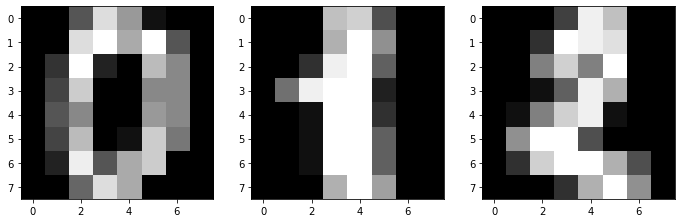

In [62]:
plt.figure(figsize =(20,4))
for numbers,(image,label)in enumerate(zip(digits.data[0:3],digits.target[0:3])):
    plt.subplot(1,5,numbers + 1)
    plt.imshow(np.reshape(image, (8,8)),cmap=plt.cm.gray)
    

<!-- Quel est le type de données? -->
le type de donnée est un sklearn.utils.Bunch,Ce n'est pas un DataFrame, mais une sorte de dictionnaire.
    :Number of Instances: 5620
    :Number of Attributes: 64
The data set contains images of hand-vritten digits: 10 classes where each class refers to a digit

<!-- Combien de pixels à une instance de données ?-->
8x8 image of integer pixels in the range 0..16.

<!--Quel est le type de données d'un pixel?que représente-t-il?
c'est une valeur binaire,

# 2)Préparez votre algorihme ML

<Figure size 432x288 with 0 Axes>

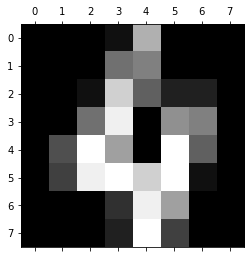

In [63]:
# Show one data
plt.gray() 
plt.matshow(digits.images[4]) 
plt.show() 

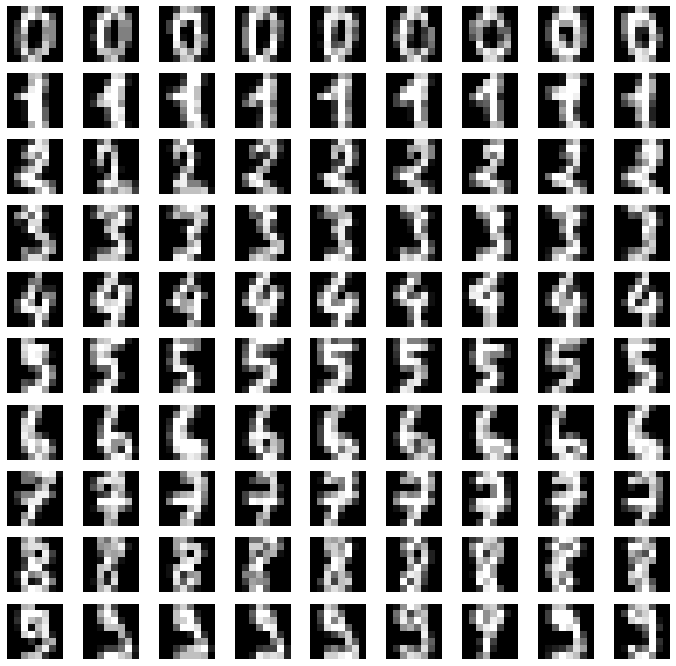

In [71]:
# Show several data for each label (== category) 

X = digits.images
Y = digits.target

n_digits = np.unique(Y)
M = 9
dim = int(np.sqrt(X.shape[1]))

fig, axs = plt.subplots(len(n_digits), M, figsize=(12, 12))

for i, d in enumerate(n_digits):
    for j in range(M):
        axs[i,j].imshow(X[Y == d][j])
        axs[i,j].axis('off')

In [73]:
#Build train test datasets

from sklearn.model_selection import train_test_split

test_size = 20
X_train,X_test, y_train, y_test = train_test_split (X, Y, test_size=test_size)

rtrain = X_train.shape[0]/X.shape[0]
rtest = X_test.shape[0]/X.shape[0]

print("train size ratio: %.3f  :%d" %(rtrain,len(X_train)))
print("test size ratio: %.3f  :%d" %(rtest,len(X_test)))

# Reformat the data to be "compliant" with sklearn input
X_train = X_train.reshape(len(X_train),64)
X_test = X_test.reshape(len(X_test),64)

train size ratio: 0.989  :1777
test size ratio: 0.011  :20


In [23]:
# Prediction for the hand-written digit 2
y_train[y_train != 2]= 0
y_test[y_test != 2]= 0
y_train[y_train == 2]= 0
y_test[y_test == 2]= 0